In [24]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

data = pd.read_csv("Housing.csv")

df = pd.DataFrame(data, columns=['price','area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'])

columns=['price','area','bedrooms','bathrooms','stories','parking','furnishingstatus']

# price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus

X = data[['area','bedrooms','bathrooms','stories','parking','furnishingstatus']]
y = data['price']
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state=101)



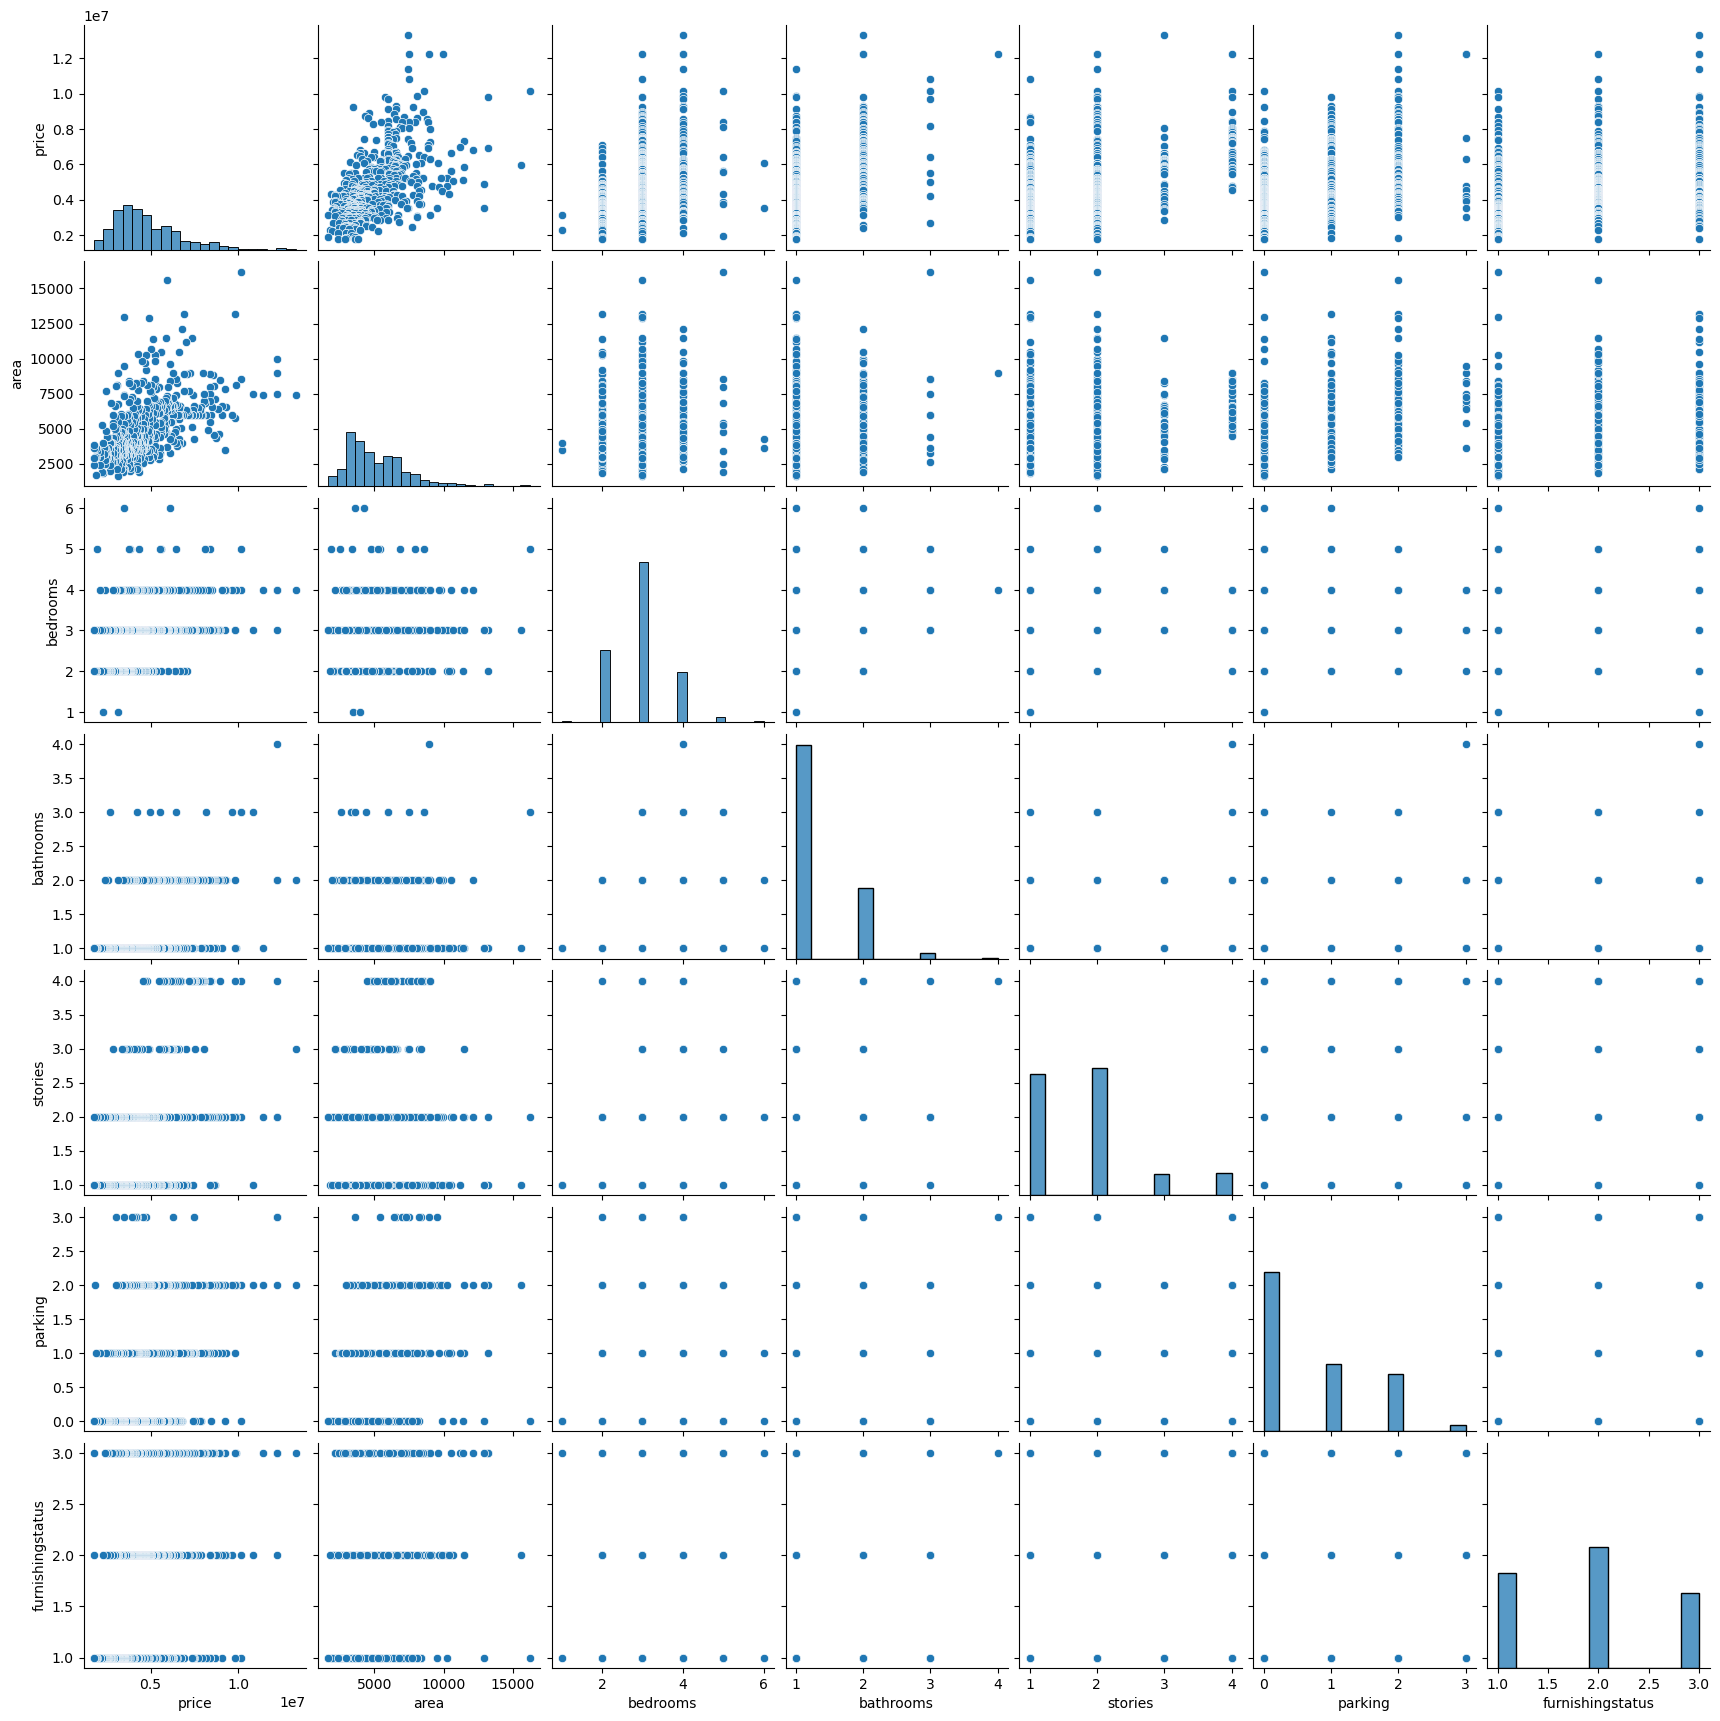

In [25]:
sns.pairplot(data[columns])

In [26]:
# Descriptive statistics
print(df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB
None


<AxesSubplot:>

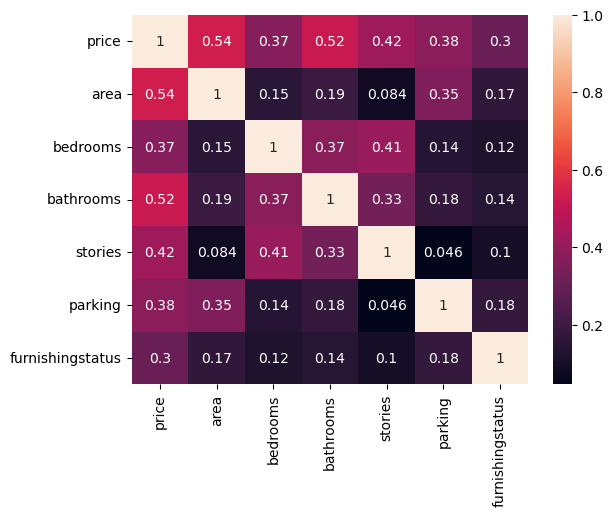

In [33]:
sns.heatmap(data[columns].corr(), annot = True)

### It's cleared from the below results that linear regression performs best on this housing dataset


In [28]:
# LINEAR REGRESSION

model_1 = LinearRegression()
model_1.fit(train_X, train_y)

results_1 = model_1.predict(test_X)
print("Model 1 : Linear Regression Results")
print("ACtual:\n", test_y[:5])
print("\nPredicted:\n", results_1[:5])
print('\nscore train : ', model_1.score(train_X,train_y))
print('score test : ', model_1.score(test_X,test_y))


rms_1 = mean_squared_error(test_y, results_1, squared=False)
print("Root Mean squared error Linear Regression :   ", rms_1)
mae_1 = mean_absolute_error(test_y, results_1)
print("Mean absolute error Linear Regression :   ", mae_1)


Model 1 : Linear Regression Results
ACtual:
 225    4753000
18     8890000
48     7455000
355    3773000
350    3780000
Name: price, dtype: int64

Predicted:
 [5177880.97549459 6294576.70795708 5085766.16408524 5932792.32342856
 3902221.72743317]

score train :  0.5963769140894329
score test :  0.5323296499749883
Root Mean squared error Linear Regression :    1227313.9427178882
Mean absolute error Linear Regression :    882446.0583491521


In [34]:
# DECISION TREE

model = DecisionTreeRegressor()
model.fit(train_X, train_y)

results = model.predict(test_X)
print("ACtual:\n", test_y[:5])
print("\nPredicted:\n", results[:5])
print('\nscore train : ', model.score(train_X,train_y))
print('score test : ', model.score(test_X,test_y))


rms = mean_squared_error(test_y, results, squared=False)
print("Root Mean squared error Decision Tree: ", rms)
mae = mean_absolute_error(test_y, results)
print("Mean absolute error Decision Tree :   ", mae)


ACtual:
 225    4753000
18     8890000
48     7455000
355    3773000
350    3780000
Name: price, dtype: int64

Predicted:
 [4123000. 3570000. 4340000. 6020000. 2590000.]

score train :  0.9960765693540177
score test :  0.09815329534568529
Root Mean squared error Decision Tree:  1704323.8086111352
Mean absolute error Linear Regression :    1195710.1851851852
